In [35]:
%reset

Once deleted, variables cannot be recovered. Proceed (y/[n])? y


In [36]:
import pandas as pd
data = pd.read_excel("Sample_data.xlsx")
data.head()

,C,n,M
0,159.00,2,259.00
1,129.00,45,174.00
2,115.31,21,154.00
3,111.25,5,111.25
4,111.69,7,111.69


In [50]:
import numpy as np
from scipy.optimize import linprog

# Sample data
sample_data = data.to_dict('index')
sample_data = [i[1] for i in sample_data.items()]

# Constants
alpha = 200  # Total allocation limit
beta = 0.15  # Minimum average deviation

# Extracting data into arrays
C = np.array([sample['C'] for sample in sample_data])
n = np.array([sample['n'] for sample in sample_data])
M = np.array([sample['M'] for sample in sample_data])

# Define objective function coefficients
c = -1 * (n - 1)

# Define inequality constraints
A_ub = np.vstack([-1 * np.eye(len(sample_data)), np.eye(len(sample_data))])
b_ub = np.hstack([C, M])

# Define equality constraint for total allocation
A_eq = np.ones((1, len(sample_data)))
b_eq = alpha

# Define bounds for decision variables
bounds = [(C[i], M[i]) for i in range(len(sample_data))]

# Solve the optimization problem
result = linprog(c, A_ub=A_ub, b_ub=b_ub, A_eq=A_eq, b_eq=b_eq, bounds=bounds, method='highs')

# Print results
print("Status:", result.message)
if result.success:
    print("Optimal Allocation:")
    for i, sample in enumerate(sample_data):
        print(f"Sample {i+1}: Allocated amount = {result.x[i]}")
    print("Total Objective Value:", -1 * result.fun)

Status: The problem is infeasible. (HiGHS Status 8: model_status is Infeasible; primal_status is At lower/fixed bound)


In [53]:
import numpy as np
from scipy.optimize import minimize

# Objective function to maximize
def objective(R):
    return -np.sum((R - C) * n)

# Constraint: Marker rate >= Cost
def marker_rate_constraint(R):
    return R - C

# Constraint: Total allocation limit
def total_allocation_constraint(R):
    return np.sum(R) - alpha

# Constraint: Minimum average deviation
def average_deviation_constraint(R):
    D = (M - R) / M
    return np.sum(D) / len(samples) - beta

# Sample data
sample_data = data.to_dict('index')
samples = [i[1] for i in sample_data.items()]

# Constants
alpha = 200  # Total allocation limit
beta = 0.15  # Minimum average deviation

# Extract data into arrays
C = np.array([sample['C'] for sample in samples])
n = np.array([sample['n'] for sample in samples])
M = np.array([sample['M'] for sample in samples])

# Initial guess for R
initial_guess = np.ones(len(samples)) * (alpha / len(samples))  # Equal allocation initially

# Define bounds for decision variables
bounds = [(C[i], M[i]) for i in range(len(samples))]

# Define constraints
constraints = [{'type': 'ineq', 'fun': marker_rate_constraint},
               {'type': 'eq', 'fun': total_allocation_constraint},
               {'type': 'ineq', 'fun': average_deviation_constraint}]

# Optimize
result = minimize(objective, initial_guess, bounds=bounds, constraints=constraints)

# Print results
print("Status:", result.message)
if result.success:
    print("Optimal Allocation:")
    for i, sample in enumerate(samples):
        print(f"Sample {i+1}: Allocated amount = {result.x[i]}")
    print("Total Objective Value:", -result.fun)


Status: Positive directional derivative for linesearch


In [58]:
for i, sample in enumerate(samples):
  print(f"Sample {i+1}: Allocated amount = {result.x[i]}")
print("Total Objective Value:", -result.fun)

Sample 1: Allocated amount = 159.0
Sample 2: Allocated amount = 129.0
Sample 3: Allocated amount = 115.31
Sample 4: Allocated amount = 111.25
Sample 5: Allocated amount = 111.69
Sample 6: Allocated amount = 112.0
Sample 7: Allocated amount = 180.45
Sample 8: Allocated amount = 151.16
Sample 9: Allocated amount = 134.23
Sample 10: Allocated amount = 129.44
Sample 11: Allocated amount = 180.45
Sample 12: Allocated amount = 151.16
Sample 13: Allocated amount = 134.23
Sample 14: Allocated amount = 129.44
Sample 15: Allocated amount = 166.99
Sample 16: Allocated amount = 166.99
Sample 17: Allocated amount = 224.0
Sample 18: Allocated amount = 214.0
Sample 19: Allocated amount = 219.0
Sample 20: Allocated amount = 159.0
Sample 21: Allocated amount = 159.0
Sample 22: Allocated amount = 133.23
Sample 23: Allocated amount = 133.23
Sample 24: Allocated amount = 141.55
Sample 25: Allocated amount = 199.0
Sample 26: Allocated amount = 100.61
Sample 27: Allocated amount = 123.28
Sample 28: Allocate

In [60]:
R = result.x

In [61]:
def objective(data, r, problems):
    with_problems = 0
    without_problems = 0
    for index, row in data.iterrows():
        with_problems += (r[index] - row["C"]) * row['n']
        if i not in problems:
            without_problems += (r[index] - row["C"]) * row['n']

    return with_problems,without_problems

In [62]:
def D_calculator(data,R):
    D = []
    for index, row in data.iterrows():
        D_temp = (row['M'] - R[index])/row['M']
        D.append(D_temp)

    return sum(D)/len(R)

In [65]:
print("Objective : {}".format(objective(data,R,[])[0]))
print("alpha : {}".format(sum(R)/len(R)))
print("beta : {}".format(D_calculator(data,R)))

Objective : 0.0
alpha : 177.55109999999996
beta : 0.22707980763917832


In [66]:
from sklearn.cluster import KMeans
import numpy as np

# Sample data
# samples = [
#     {"C": 159.00, "n": 2, "M": 259.00},
#     {"C": 129.00, "n": 45, "M": 174.00},
#     # Add more sample data as needed
# ]

# Extract features
X = np.array([[sample['C'], sample['n'], sample['M']] for sample in samples])

# Perform K-means clustering
kmeans = KMeans(n_clusters=3)  # Adjust number of clusters as needed
kmeans.fit(X)

# Get cluster labels
cluster_labels = kmeans.labels_

# Analyze clusters
for cluster_id in range(kmeans.n_clusters):
    cluster_samples = np.array([samples[i] for i in range(len(samples)) if cluster_labels[i] == cluster_id])
    print(f"Cluster {cluster_id + 1}: {len(cluster_samples)} samples")
    # Analyze characteristics of the cluster (e.g., average cost, marker rate)

# Define allocation strategy based on cluster characteristics
# ...

# Allocate resources according to the strategy
# ...


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Cluster 1: 54 samples
Cluster 2: 44 samples
Cluster 3: 2 samples


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


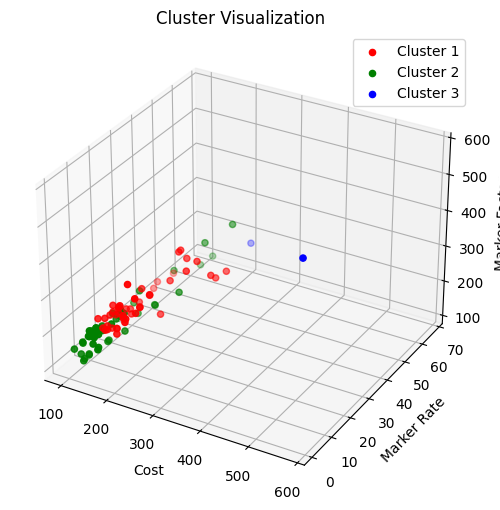

In [67]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D  # Importing 3D plotting functionality

# Sample data
# samples = [
#     {"C": 159.00, "n": 2, "M": 259.00},
#     {"C": 129.00, "n": 45, "M": 174.00},
#     # Add more sample data as needed
# ]

# Extract features
X = np.array([[sample['C'], sample['n'], sample['M']] for sample in samples])

# Perform K-means clustering
kmeans = KMeans(n_clusters=3)  # Adjust number of clusters as needed
kmeans.fit(X)

# Get cluster labels
cluster_labels = kmeans.labels_

# Plot clusters
fig = plt.figure(figsize=(10, 6))
ax = fig.add_subplot(111, projection='3d')

colors = ['r', 'g', 'b', 'y', 'c', 'm']
for cluster_id in range(kmeans.n_clusters):
    cluster_samples = X[cluster_labels == cluster_id]
    ax.scatter(cluster_samples[:, 0], cluster_samples[:, 1], cluster_samples[:, 2],
               c=colors[cluster_id], label=f'Cluster {cluster_id + 1}')

# Add labels and legend
ax.set_xlabel('Cost')
ax.set_ylabel('Marker Rate')
ax.set_zlabel('Marker Factor')
ax.set_title('Cluster Visualization')
ax.legend()

# Show plot
plt.show()
